### Bases de python et manipulation des tables des données
#### Date de soumission: jeudi 08 juin 2023 à 12 H
#### Dans ce notebook nous allons reaboder les bases de python et de la manipulation des tables des données
#### Nous travaillerons avec la base des données des prix des propriétes en amérique du sud. Cette base est disponible ici
- [data price house (url)](https://drive.google.com/file/d/1Sr39gVhzewZzb1Qd2qaH37-SRrXCSL-O/view?usp=sharing)

### 1. Importation et compréhension de la base

**Tâche 1.1:** Importer la base des données dans `df` et en faire une copie.

In [2]:
import pandas as pd # manipulation de données
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,  mean_squared_error


In [3]:
# Exécuter cette cellule pour importer la table des données.
url = "https://drive.google.com/file/d/119T69YZ0ZGNrtXx8m7MRH-BgMyEVT8Pu/view?usp=sharing" # l'adresse 
                                                                                          # indiquéé ci-haut
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2] # Accès à la table
df = pd.read_csv(path) # Lecture de la table des données avec pandas, table nommée df.

In [4]:
# Vérifier la forme ou les dimensions de df 
# Vous devriez trouver 26 colonnes et 102283 observations
df.shape

(102283, 26)

In [5]:
df.tail(3)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l3,l4,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,location,price_usd
102280,102280,INz0ZhibLBCbioOwtGtOtw==,Propiedad,2020-04-13,9999-12-31,2020-04-13,-34.610996,-58.513443,Villa Devoto,NaN,...,131.0,$400000.0,USD,NaN,Tinogasta 4700 - U$D 400.000 - Casa en Venta,"Excelente triplex de 4 ambientes, consta de:- ...",Casa,Venta,Argentina/Capital Federal,400000.0
102281,102281,HNt/pBqpgMB7hZvKkfXKlQ==,Propiedad,2020-04-13,9999-12-31,2020-04-13,-38.014929,-57.545163,Mar del Plata,NaN,...,NaN,$315000.0,USD,NaN,Venta Departamento 3 Ambientes,. Living comedor amplio\n. Toilette\n. Cocina ...,Departamento,Venta,Argentina/Buenos Aires Costa Atlántica,315000.0
102282,102282,TJjXYEYjjgMy7H8xekNmLA==,Propiedad,2020-04-13,9999-12-31,2020-04-13,-37.984363,-57.551815,Mar del Plata,NaN,...,NaN,$220000.0,USD,NaN,((((OPORTUNIDAD EN POMPEYA))) 5 AMBIENTES EN D...,Magnifica propiedad ubicada en el corazon del ...,Casa,Venta,Argentina/Buenos Aires Costa Atlántica,220000.0


In [22]:
# Faites une copie de la base des données pour ne pas être obligé 
# de refaire l'importation à chaque fois en éxécutant ce code. les manipulations ultérieures se feront
# dans df_copy
df_copy = df.copy()

In [5]:
# Obtenir les informations clés de df
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102283 entries, 0 to 102282
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       102283 non-null  int64  
 1   id               102283 non-null  object 
 2   ad_type          102283 non-null  object 
 3   start_date       102283 non-null  object 
 4   end_date         102281 non-null  object 
 5   created_on       102281 non-null  object 
 6   lat              88294 non-null   float64
 7   lon              88260 non-null   float64
 8   l3               97588 non-null   object 
 9   l4               26568 non-null   object 
 10  l5               402 non-null     object 
 11  l6               0 non-null       float64
 12  rooms            59733 non-null   float64
 13  bedrooms         36493 non-null   float64
 14  bathrooms        79147 non-null   float64
 15  surface_total    62344 non-null   float64
 16  surface_covered  59399 non-null   floa

**Tâche 1.2:** Compréhension de la base

- [Imprimer les 3 premières observations à l'écran]()
- [Imprimer la liste de toutes les colonnes]()
- [Créer une liste de colonnes contenant les colonnes clés suivantes: 'location','surface_covered','lat', 'lon', 'price']()

In [7]:
First_tree_obs = df_copy.head(3)
First_tree_obs

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l3,l4,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,location,price_usd
0,0,ep6xuGWQRVKnQe1XkXCJaA==,Propiedad,2019-11-18,2019-12-20,2019-11-18,-31.531609,-68.356499,NaN,NaN,...,1.0,$1490000.0,ARS,NaN,Venta Terreno 7 Hectáreas en San Martín,Corredor Responsable: MAURO SOSA MEGLIOLI - CP...,Otro,Venta,Argentina/San Juan,1490000.0
1,1,RQQ9zjxcXF7nIpvlKJ8W6g==,Propiedad,2019-11-18,9999-12-31,2019-11-18,-34.384445,-57.888442,NaN,NaN,...,NaN,$nan,NaN,Mensual,Chacra - Colonia del Sacramento,Exclusiva y única fracción de 1 hectárea ubica...,Otro,Venta,Uruguay/Colonia,NaN
2,2,jXkw441jqfY/NJaWd7QPoA==,Propiedad,2019-11-18,9999-12-31,2019-11-18,-32.405751,-64.989122,Carpintería,NaN,...,NaN,$nan,NaN,Mensual,Cabañas Los Nonos - Cabaña para 2 a 6 personas...,Cabañas Los Nonos - Cabaña para 2 a 6 personas...,Otro,Alquiler temporal,Argentina/San Luis,NaN


In [8]:
# Liste des colonnes 
list_col = df_copy.columns
list_col

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type', 'location',
       'price_usd'],
      dtype='object')

In [9]:
# Colonnes clés
key_col = ['location','surface_covered','lat', 'lon', 'price']

In [33]:
# Sauvegarder la base contenant les colonnes clés dans la base 'df_key' et 
# imprimer les dimensions de 'df_key'
df_key = df_copy[key_col]
print("df_key shape:", df_key.shape)

df_key shape: (102283, 5)


In [11]:
df_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102283 entries, 0 to 102282
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   location         102281 non-null  object 
 1   surface_covered  59399 non-null   float64
 2   lat              88294 non-null   float64
 3   lon              88260 non-null   float64
 4   price            102283 non-null  object 
dtypes: float64(3), object(2)
memory usage: 3.9+ MB


**Tâche 1.3:** Ecrire une fonction `clean` qui permet de: 1)Supprimer le sigle $ de la colonne nommée`price`. 2) Changer les valeurs de la colonne `price` en valeurs numériques. 3)Nettoyer `df_key` en supprimant les lignes avec les valeurs manquantes. 

- [Types des données-Variables en python](https://github.com/pefura/IFPERA-data-science/blob/main/Tutorial%20d%E2%80%99introduction%20%C3%A0%20l%E2%80%99analyse%20des%20donn%C3%A9es%20avec%20Python.pdf)
- [Remplacer les chaînes de caractères en utilisant pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html)
- [Supprimer les lignes avec les valeurs manquantes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [37]:
df_copy  = df.copy()

In [38]:
df_key_copy = df_key.copy()
df_key_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102283 entries, 0 to 102282
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   location         102281 non-null  object 
 1   surface_covered  59399 non-null   float64
 2   lat              88294 non-null   float64
 3   lon              88260 non-null   float64
 4   price            102283 non-null  object 
dtypes: float64(3), object(2)
memory usage: 3.9+ MB


In [30]:
def clean(df):
    # instructions
    ## Supprimer le sigle $ de la colonne  nommée price
    ## Changer les valeurs de la colonne price en valeurs numériques
    df["price"] = df["price"]. str.replace("$", "").astype(float)
    ## Nettoyer df_key en supprimant les lignes avec les valeurs manquantes.
    df.dropna(inplace = True)
    # renvoyer la solution
    return df
          

In [35]:
df_test = clean(df=df_key_copy)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50209 entries, 0 to 102280
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         50209 non-null  object 
 1   surface_covered  50209 non-null  float64
 2   lat              50209 non-null  float64
 3   lon              50209 non-null  float64
 4   price            50209 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.3+ MB


In [12]:
df_copy["price"]

0         $1490000.0
1               $nan
2               $nan
3           $25000.0
4         $1850000.0
             ...    
102278     $120000.0
102279     $120000.0
102280     $400000.0
102281     $315000.0
102282     $220000.0
Name: price, Length: 102283, dtype: object

In [20]:
# Try for comprehension
df_copy["price"] = df_copy["price"]. str.replace("$", "").astype(float)
df_copy["price"] 

0         1490000.0
1               NaN
2               NaN
3           25000.0
4         1850000.0
            ...    
102278     120000.0
102279     120000.0
102280     400000.0
102281     315000.0
102282     220000.0
Name: price, Length: 102283, dtype: float64

In [45]:
def clean(df):
    # Supprimer le sigle $ de la colonne nommée price
    # Changer les valeurs de la colonne price en valeurs numériques
    df["price"] = df["price"]. str.replace("$", "").astype(float)
    # Nettoyer df_key en supprimant les lignes avec les valeurs manquantes
    df.dropna(inplace = True)
    return df

In [34]:
# la base néttoyée est df_clean.Vous devez trouver une base avec 5 colonnes et 50209 observations
df_key_copy = df_key.copy() # Faire une copie de df_key et utiliser la copie pour ne pas avoir d'erreur
               # ou utiliser une version non transformée


In [39]:
df_clean = clean(df = df_key_copy )               
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50209 entries, 0 to 102280
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         50209 non-null  object 
 1   surface_covered  50209 non-null  float64
 2   lat              50209 non-null  float64
 3   lon              50209 non-null  float64
 4   price            50209 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.3+ MB


In [48]:
df_key_copy = df_key.copy()

**Tâche 1.4:** Ecrire une fonction `wrangle` qui permet de: 1)Inclure les modifications de la fonction `clean`. 2) Séparer la colonne `location` en `2` colonnes dont l'une est le pays (`country`)de la propriété et l'autre l'état où se trouve la propriété (`state`); Notez que le `pays` et `l'état` se trouvent respectivement en première et en deuxième position des modalités de la colonne `location`. 

- [Fonction imbriquée]()
- [Scinder les chaînes de caractères dans une colonne pour créer d'autres en utilisant pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)


In [47]:
def wrangle (df):
    # Fonction clean
    # Supprimer le sigle $ de la colonne nommée price
    # Changer les valeurs de la colonne price en valeurs numériques
    df["price"] = df["price"]. str.replace("$", "").astype(float)
    # Nettoyer df_key en supprimant les lignes avec les valeurs manquantes
    df.dropna(inplace = True)
    # Séparer la colonne location en 2 colonnes dont l'une 
    # est le pays (country)de la propriété et l'autre l'état où se trouve la propriété (state)
    df[["country", "state"]] = df["location"].str.split("/", expand= True)
    return df

In [36]:
def wrangle (df):
    df = clean(df)
    df[["country", "state"]] = df["location"].str.split("/", expand= True)
    return df

In [49]:
# Résulats de la fonction wrangle
# Attention d'utiliser une version non transformée de df_key

df_wrangle = wrangle(df =df_key_copy)
df_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50209 entries, 0 to 102280
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         50209 non-null  object 
 1   surface_covered  50209 non-null  float64
 2   lat              50209 non-null  float64
 3   lon              50209 non-null  float64
 4   price            50209 non-null  float64
 5   country          50209 non-null  object 
 6   state            50209 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.1+ MB


**Tâche 1.5:** Utiliser la boucle `for` et la méthode `split` pour créer `country` et `state` de la `tâche 1.4.
- [Boucle for](https://docs.python.org/3/tutorial/controlflow.html#for-statements)
- [Créer un dataframe en utilisant le dictionnaire](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)


In [40]:
# Try and copy dataframe
df_key_copy = df_key.copy() 
list(df_key_copy["location"])[0].split("/")[0]

'Argentina'

In [50]:
# for loop to create country and state
country = []
state = []
for f in list(df_wrangle["location"]):
    coun = f.split("/")[0]
    sta = f.split("/")[1]
    country.append(coun)
    state.append(sta)

In [51]:
# Combine in dictionnary and the create dataframe
dictio = dict(df_wrangle)
dictio["country"] = country
dictio["state"] = state

In [52]:
# Résulats de la fonction wrangle
# Attention d'utiliser une version non transformée de df_key
df_for = pd.DataFrame(dictio)
df_for.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50209 entries, 0 to 102280
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         50209 non-null  object 
 1   surface_covered  50209 non-null  float64
 2   lat              50209 non-null  float64
 3   lon              50209 non-null  float64
 4   price            50209 non-null  float64
 5   country          50209 non-null  object 
 6   state            50209 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.1+ MB


**Tâche 1.6:** Supprimer la colonne `location` table de données à l'aide de la méthode `drop`.
- [Supprimer une ou plusieurs colonnes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)


In [53]:
df_for.drop(columns = "location", inplace = True)
df_for.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50209 entries, 0 to 102280
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surface_covered  50209 non-null  float64
 1   lat              50209 non-null  float64
 2   lon              50209 non-null  float64
 3   price            50209 non-null  float64
 4   country          50209 non-null  object 
 5   state            50209 non-null  object 
dtypes: float64(4), object(2)
memory usage: 2.7+ MB


In [45]:
# Quels sont les pays existant dans la base des données et leurs effectifs?
country = df_for["country"].unique()
country

array(['Argentina', 'Uruguay', 'Estados Unidos', 'Brasil'], dtype=object)

In [46]:
# Déterminer les effectifs des états
effectif = df_for["country"].value_counts()
effectif

country
Argentina         48234
Uruguay            1913
Estados Unidos       59
Brasil                3
Name: count, dtype: int64

In [1]:
# Tracer l'histogramme et la boite à moustache horizontale des prix avec matplotlib. 
# Quelles conclusions tirez-vous? 


Text(0.5, 1.0, 'Distribution of property Price')

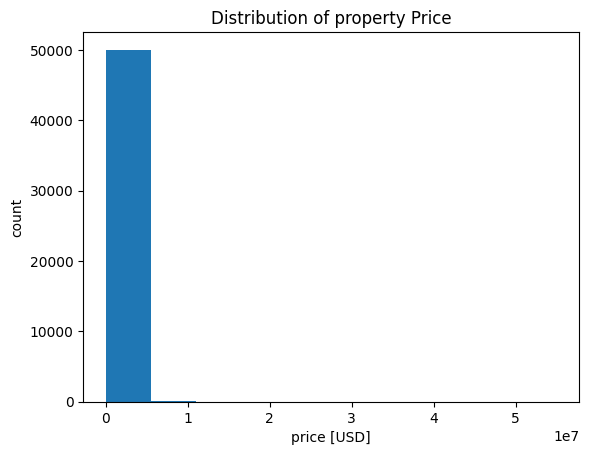

In [47]:
# histogramme
plt.hist(df_for["price"])
plt.xlabel("price [USD]")
plt.ylabel("count")
plt.title("Distribution of property Price")

{'whiskers': [<matplotlib.lines.Line2D at 0x20c37082890>,
 'caps': [<matplotlib.lines.Line2D at 0x20c37014050>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c372de910>],
 'medians': [<matplotlib.lines.Line2D at 0x20c3707de10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c3707f690>],
 'means': []}

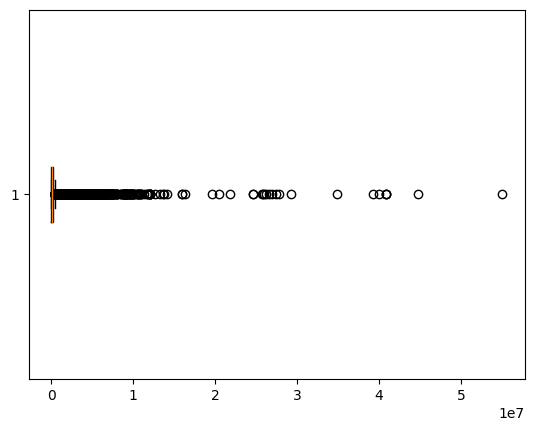

In [70]:
# Tracé boite à moustache horizontale 
plt.boxplot(x=df_for['price'], vert=False)

**Tâche 1.7:** Selectionner à l'aide des masques les propriétes 1) se trouvant en `Argentine` 2) dans l'état de `Capital Federal` 3) coûtant au maximum 400 milles USD 4) avec exlusion des prix n'ont compris entre le 10ème et le 90ème percentiles (pour exclure les valeurs extrèmes). Utiliser une fonction pour faire cette manipulation. La base obtenue sera nommée df_final.
- [Filter les colonnes et lignes selon certaines conditions]()

In [55]:
def mask(df):
## Clean
    # Supprimer le sigle $ de la colonne nommée price
    # Changer les valeurs de la colonne price en valeurs numériques
    df["price"] = df["price"]. str.replace("$", "").astype(float)
    # key columns and restriction df to these columns
    key_col = ['location','surface_covered','lat', 'lon', 'price']
    df = df[key_col]
    # Nettoyer df_key en supprimant les lignes avec les valeurs manquantes
    df.dropna(inplace = True)
## other instructions to have: wrangle
    # create country and state
    df[["country", "state"]] = df["location"].str.split("/", expand= True)
    df.drop(columns = "location", inplace = True)
## Mask for country, state and price
    mask_country = df["country"]=="Argentina"
    mask_state = df["state"]=="Capital Federal"
    mask_price = df["price"] < 400_000
    df = df[mask_country & mask_state & mask_price] 
    ## mask percentiles surface covered
    perc_sur_10, perc_sur_90 = df["surface_covered"].quantile([0.1, 0.90])
    mask_surface = df["surface_covered"].between(perc_sur_10, perc_sur_90)
    df = df[mask_surface]
    
    return df

In [57]:
df_copy = df.copy()

In [58]:
df_final = mask(df= df_copy)
df_final.shape

C:\Users\DDD\AppData\Local\Temp\ipykernel_14244\1924791611.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)
C:\Users\DDD\AppData\Local\Temp\ipykernel_14244\1924791611.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["country", "state"]] = df["location"].str.split("/", expand= True)
C:\Users\DDD\AppData\Local\Temp\ipykernel_14244\1924791611.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(15259, 6)

In [59]:
df_final.head(3)

,surface_covered,lat,lon,price,country,state
154,30.0,-34.615442,-58.424563,15000.0,Argentina,Capital Federal
155,88.0,-34.567000,-58.470011,310000.0,Argentina,Capital Federal
156,88.0,-34.636405,-58.475218,169000.0,Argentina,Capital Federal


In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15259 entries, 154 to 102169
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surface_covered  15259 non-null  float64
 1   lat              15259 non-null  float64
 2   lon              15259 non-null  float64
 3   price            15259 non-null  float64
 4   country          15259 non-null  object 
 5   state            15259 non-null  object 
dtypes: float64(4), object(2)
memory usage: 834.5+ KB


### 2. Visualisation des données et prédiction

**Task 2.1:** Create a scatter plot showing price vs. surface_covered  in `Capital federal` that has the largest number of properties. Be sure to label the x-axis `"Area [sq meters]"` and the y-axis `"Price [USD]"`; and use the title `Price vs. Area`. Use Matplotlib (`plt`).

Text(0.5, 1.0, 'Price vs. Area')

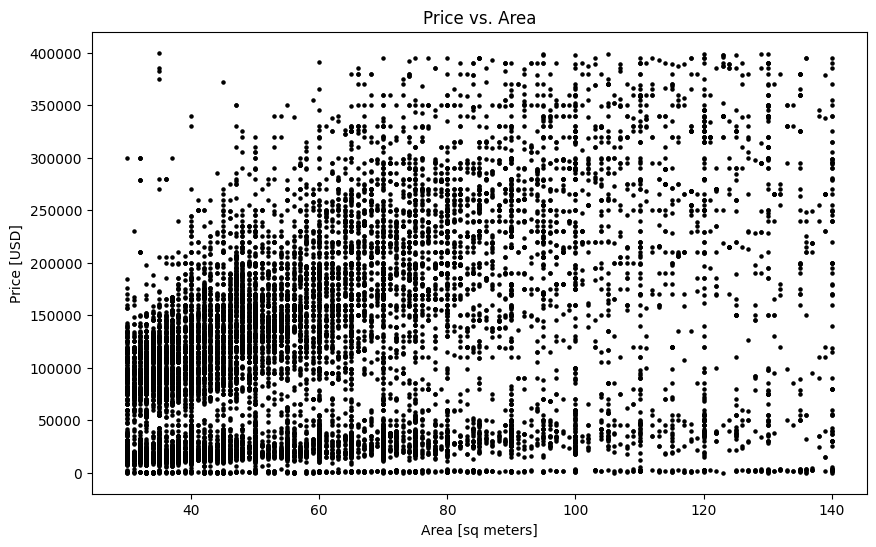

In [75]:
ax, fig = plt.subplots(figsize=(10, 6))
plt.scatter( df_final["surface_covered"], df_final["price"], s = 5, c = "black")
plt.xlabel ("Area [sq meters]")
plt.ylabel ("Price [USD]")
plt.title("Price vs. Area")

{'whiskers': [<matplotlib.lines.Line2D at 0x20c369e81d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c369e5ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c369e9dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c369e6910>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c36a09c90>],
 'means': []}

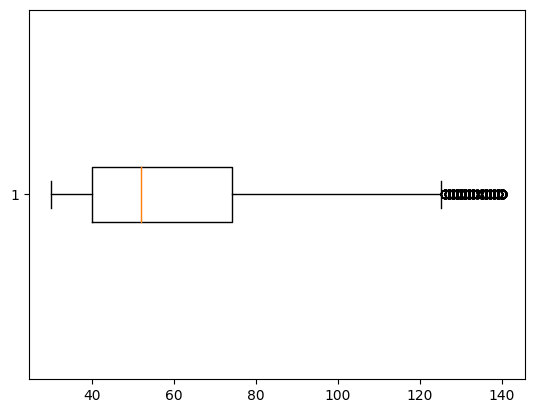

In [72]:
# Tracé boite à moustache horizontale 
plt.boxplot(x=df_final['surface_covered'], vert=False)

**Task 2.2:** calculate the correlation coefficient between price and surface_covered

In [79]:
corr = df_final.surface_covered.corr(df_final.price).round(2)
print(corr)

0.43


**Task 2.3:** Develop and evaluate regression model to predict price according to surface_covered, using SKlean package

In [80]:
# split
y= df_final["price"]
X = df_final[["surface_covered"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (12207, 1)
y_train shape: (12207,)


In [81]:
# Basseline MAE and plot
y_mean = y_train.mean()
y_pred_baseline = y_mean.repeat(len(y_train)) # [y_mean]*len(y_mean)
y_pred_baseline

array([119285.75784386, 119285.75784386, 119285.75784386, ...,
       119285.75784386, 119285.75784386, 119285.75784386])

In [82]:
# Baseline informations
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 119285.76
Baseline MAE: 76695.79


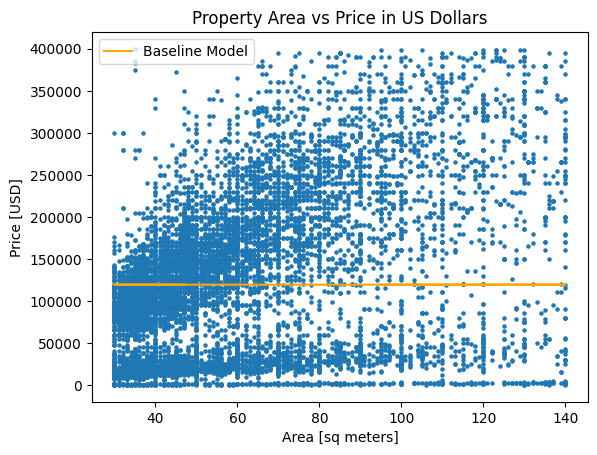

In [83]:
plt.plot(X_train["surface_covered"], y_pred_baseline, color = "orange", label = "Baseline Model")
plt.scatter(X_train, y_train, s= 5)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Property Area vs Price in US Dollars");
plt.legend();

In [84]:
# Instantiate and train
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
# MAE for train set
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([ 99097.90057279,  77516.65381359, 109888.52395238, 116054.59445501,
       103722.45344976])

In [86]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 69315.2


In [87]:
# MAE for test set
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     91390.312445
1    227043.863502
2    105263.971075
3     74433.618562
4    100639.418198
dtype: float64

In [88]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", round(mae_test, 2))

Test MAE: 68322.5


**Task 2.4:** Rewrite the price as p = ax + b

In [90]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]

print(
    f"intercept is ${intercept}  and coefficient is ${coefficient}."
)

intercept is $26646.57  and coefficient is $1541.52.


In [92]:
print(
    f"price (USD) = {intercept} + {coefficient} * surface_covered."
)

price (USD) = 26646.57 + 1541.52 * surface_covered.
